In [85]:
import pandas_profiling as pp
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
def CalcOutliers(df_num): 
    '''
    
    Leonardo Ferreira 20/10/2018
    Set a numerical value and it will calculate the upper, lower and total number of outliers
    It will print a lot of statistics of the numerical feature that you set on input
    
    '''
    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

In [212]:
def dist(df, col, title, x, y):

    # define the size of figures that I will build
    plt.figure(figsize=(16,5))

    g = sns.countplot(x=col, data=df, color='forestgreen') # seting the seaborn countplot to known the points distribuition
    g.set_title(title, fontsize=20) # seting title and size of font
    g.set_xlabel(x, fontsize=15) # seting xlabel and size of font
    g.set_ylabel(y, fontsize=15) # seting ylabel and size of font
    plt.show() #rendering the graphs

In [22]:
df = pd.read_csv('all_wines.csv')

In [23]:
df.columns

Index(['link', 'Nome', 'País', 'Preço_Sócio', 'Preço_Normal', 'Pontuação',
       'Avaliações', 'somelier', 'Decantação', 'Origem', 'Olfativo',
       'Amadurecimento', 'Uvas', 'Gustativo', 'Visual', 'Harmonização',
       'Temperatura de serviço', 'Safra', 'Classificação', 'Teor Alcoólico',
       'Vinícola', 'Tipo', 'Potencial de guarda'],
      dtype='object')

In [24]:
df.head()

link  \
0  https://wine.com.br/vinhos/maison-le-star-rose...   
1  https://wine.com.br/vinhos/ropiteau-freres-les...   
2  https://wine.com.br/vinhos/punta-paramo-malbec...   
3  https://wine.com.br/vinhos/gerard-bertrand-gra...   
4  https://wine.com.br/vinhos/marques-de-somera-g...   

                                                Nome  País  Preço_Sócio  \
0                         Maison Le Star Rosé On Ice   NaN          NaN   
1  Ropiteau Frères Les Plants Nobles Pinot Noir 2017   NaN          NaN   
2                           Punta Paramo Malbec 2018   NaN          NaN   
3  Gérard Bertrand Grand Terroir A.O.P. Les Aspre...   NaN          NaN   
4                    Marqués de Somera Garnacha 2018   NaN          NaN   

   Preço_Normal  Pontuação  Avaliações  \
0           NaN        3.5        26.0   
1           NaN        4.5        44.0   
2           NaN        3.5         8.0   
3           NaN        1.0         2.0   
4           NaN        4.0        17.0   

                                            somelier  Decantação  \
0  Rosé francês frutado, leve, fresco e com doçur...         NaN   
1  Com aroma de frutas vermelhas, sobre notas de ...         NaN   
2  Estilo de Malbec fácil de beber e macio, ideal...         NaN   
3  Nasce de videiras cultivada em Les Aspres (ári...  30 minutos   
4  Esse exemplar é elaborado na região espanhola ...         NaN   

                        Origem  ...  \
0                          NaN  ...   
1  França-Languedoc-Roussillon  ...   
2            Argentina-Mendoza  ...   
3            França-Les Aspres  ...   
4             Espanha-Cariñena  ...   

                                           Gustativo  \
0      Leve, acidez agradável, frutado, doçura média   
1  Corpo de leve para médio, fresco, taninos deli...   
2  Corpo de leve para médio, taninos macios, acid...   
3  Médio corpo, taninos sedosos, acidez agradável...   
4     Médio corpo, frutado, fresco, taninos macios,    

                        Visual  \
0                   Rosa claro   
1                         Rubi   
2  Rubi com reflexos violáceos   
3                         Rubi   
4                         Rubi   

                                        Harmonização Temperatura de serviço  \
0  Salada de frutos do mar, bruschettas e tapas, ...                   8 °C   
1  Ratatouille, iscas de filé mignon acebolado, n...                  15 °C   
2  Fraldinha ao forno, pizza de calabresa, quiche...                  15 °C   
3  Pernil de cordeiro assado, paleta de javali co...                  16 °C   
4  Nhoque à bolonhesa, filé à parmigiana, arroz c...                  15 °C   

    Safra       Classificação Teor Alcoólico                   Vinícola  \
0     NaN  Meio Seco/Demi-Sec     11.50% ABV             Maison Le Star   
1  2017.0                Seco     12.50% ABV            Ropiteau Frères   
2  2018.0                Seco     13.80% ABV  Bodega Don Cristóbal 1492   
3  2015.0                Seco     14.00% ABV            Gérard Bertrand   
4  2018.0                Seco     13.00% ABV                    Covinca   

    Tipo Potencial de guarda  
0   Rosé              3 anos  
1  Tinto              4 anos  
2  Tinto              7 anos  
3  Tinto              7 anos  
4  Tinto              4 anos  

[5 rows x 23 columns]

In [25]:
df.columns = ['Link', 'Nome', 'País', 'Preço_Sócio', 'Preço_Normal', 'Pontuação',
       'Avaliações', 'Somelier', 'Decantação', 'Origem', 'Olfativo',
       'Amadurecimento', 'Uvas', 'Gustativo', 'Visual', 'Harmonização',
       'Temperatura', 'Safra', 'Classificação', 'Teor_Alcoólico',
       'Vinícola', 'Tipo', 'Potencial_Guarda']

Remover kits de vinhos, estes não representam amostras de interesse. 

In [26]:
kit = ((df.Nome.str.contains('Kit')) | (df.Nome.str.contains("KIT")) | (df.Nome.str.contains('WineBox')))

In [27]:
df[kit].shape ; df = df[~kit]

In [28]:
df[df.Nome.str.contains('Experiencias')].shape

(3, 23)

In [29]:
df = df[~df.Nome.str.contains('Experiencias')]

Transformar Strings em Dados Numéricos

In [30]:
df.Temperatura.unique()

array(['8 °C', '15 °C', '16 °C', '9 °C', '7 °C', '10 °C', nan, '18 °C',
       '14 °C', '5 °C', '6 °C', '17 °C', '11 °C', '12 °C', '13 °C',
       '4 °C'], dtype=object)

In [31]:
df['Temperatura'] = df.Temperatura.str.replace(" °C", '').astype(float)

In [32]:
df.Temperatura.unique()

array([ 8., 15., 16.,  9.,  7., 10., nan, 18., 14.,  5.,  6., 17., 11.,
       12., 13.,  4.])

In [33]:
df.Teor_Alcoólico.unique()

array(['11.50% ABV', '12.50% ABV', '13.80% ABV', '14.00% ABV',
       '13.00% ABV', '12.00% ABV', '7.50% ABV', '14.50% ABV',
       '13.50% ABV', nan, '10.00% ABV', '15.50% ABV', '11.00% ABV',
       '9.50% ABV', '12.80% ABV', '14.26% ABV', '15.00% ABV',
       '14.30% ABV', '10.50% ABV', '14.10% ABV', '13.40% ABV',
       '14.20% ABV', '15.10% ABV', '11.70% ABV', '11.80% ABV',
       '11.05% ABV', '16.00% ABV', '13.70% ABV', '8.00% ABV',
       '12.40% ABV', '12.70% ABV', '13.90% ABV', '9.00% ABV',
       '15.40% ABV', '5.50% ABV', '17.00% ABV', '14.40% ABV',
       '13.20% ABV', '13.10% ABV', '11.60% ABV', '15.20% ABV',
       '15.30% ABV', '14.70% ABV', '14.60% ABV', '20.00% ABV',
       '12.20% ABV', '17.50% ABV', '14.90% ABV', '13.30% ABV',
       '15.60% ABV', '11.90% ABV', '14.09% ABV', '13.95% ABV',
       '12.30% ABV', '13.60% ABV', '14.80% ABV', '19.50% ABV',
       '6.50% ABV', '7.00% ABV', '19.00% ABV', '20.40% ABV', '18.00% ABV',
       '7.80% ABV', '0.50% ABV', '14.68% AB

In [34]:
df['Teor_Alcoólico'] = df.Teor_Alcoólico.str.replace("% ABV", '').astype(float)

In [35]:
df.Teor_Alcoólico.unique()

array([11.5 , 12.5 , 13.8 , 14.  , 13.  , 12.  ,  7.5 , 14.5 , 13.5 ,
         nan, 10.  , 15.5 , 11.  ,  9.5 , 12.8 , 14.26, 15.  , 14.3 ,
       10.5 , 14.1 , 13.4 , 14.2 , 15.1 , 11.7 , 11.8 , 11.05, 16.  ,
       13.7 ,  8.  , 12.4 , 12.7 , 13.9 ,  9.  , 15.4 ,  5.5 , 17.  ,
       14.4 , 13.2 , 13.1 , 11.6 , 15.2 , 15.3 , 14.7 , 14.6 , 20.  ,
       12.2 , 17.5 , 14.9 , 13.3 , 15.6 , 11.9 , 14.09, 13.95, 12.3 ,
       13.6 , 14.8 , 19.5 ,  6.5 ,  7.  , 19.  , 20.4 , 18.  ,  7.8 ,
        0.5 , 14.68, 12.9 , 12.28])

In [36]:
df.Potencial_Guarda.unique()

array(['3 anos', '4 anos', '7 anos', '2 anos', '6 anos', '5 anos', nan,
       '20 anos', '10 anos', '8 anos', '9 anos', '13 anos', '15 anos',
       '12 anos', '11 anos', '14 anos', '30 anos', '25 anos', '35 anos',
       '40 anos', '23 anos', '50 anos', '18 anos', '17 anos', '16 anos',
       '22 anos', '19 anos', '44 anos', '1 ano'], dtype=object)

In [37]:
df['Potencial_Guarda'] = df.Potencial_Guarda.str.replace(" anos", '')
df['Potencial_Guarda'] = df.Potencial_Guarda.str.replace(" ano", '').astype(float)

In [38]:
df.head()

Link  \
0  https://wine.com.br/vinhos/maison-le-star-rose...   
1  https://wine.com.br/vinhos/ropiteau-freres-les...   
2  https://wine.com.br/vinhos/punta-paramo-malbec...   
3  https://wine.com.br/vinhos/gerard-bertrand-gra...   
4  https://wine.com.br/vinhos/marques-de-somera-g...   

                                                Nome  País  Preço_Sócio  \
0                         Maison Le Star Rosé On Ice   NaN          NaN   
1  Ropiteau Frères Les Plants Nobles Pinot Noir 2017   NaN          NaN   
2                           Punta Paramo Malbec 2018   NaN          NaN   
3  Gérard Bertrand Grand Terroir A.O.P. Les Aspre...   NaN          NaN   
4                    Marqués de Somera Garnacha 2018   NaN          NaN   

   Preço_Normal  Pontuação  Avaliações  \
0           NaN        3.5        26.0   
1           NaN        4.5        44.0   
2           NaN        3.5         8.0   
3           NaN        1.0         2.0   
4           NaN        4.0        17.0   

                                            Somelier  Decantação  \
0  Rosé francês frutado, leve, fresco e com doçur...         NaN   
1  Com aroma de frutas vermelhas, sobre notas de ...         NaN   
2  Estilo de Malbec fácil de beber e macio, ideal...         NaN   
3  Nasce de videiras cultivada em Les Aspres (ári...  30 minutos   
4  Esse exemplar é elaborado na região espanhola ...         NaN   

                        Origem  ...  \
0                          NaN  ...   
1  França-Languedoc-Roussillon  ...   
2            Argentina-Mendoza  ...   
3            França-Les Aspres  ...   
4             Espanha-Cariñena  ...   

                                           Gustativo  \
0      Leve, acidez agradável, frutado, doçura média   
1  Corpo de leve para médio, fresco, taninos deli...   
2  Corpo de leve para médio, taninos macios, acid...   
3  Médio corpo, taninos sedosos, acidez agradável...   
4     Médio corpo, frutado, fresco, taninos macios,    

                        Visual  \
0                   Rosa claro   
1                         Rubi   
2  Rubi com reflexos violáceos   
3                         Rubi   
4                         Rubi   

                                        Harmonização Temperatura   Safra  \
0  Salada de frutos do mar, bruschettas e tapas, ...         8.0     NaN   
1  Ratatouille, iscas de filé mignon acebolado, n...        15.0  2017.0   
2  Fraldinha ao forno, pizza de calabresa, quiche...        15.0  2018.0   
3  Pernil de cordeiro assado, paleta de javali co...        16.0  2015.0   
4  Nhoque à bolonhesa, filé à parmigiana, arroz c...        15.0  2018.0   

        Classificação  Teor_Alcoólico                   Vinícola   Tipo  \
0  Meio Seco/Demi-Sec            11.5             Maison Le Star   Rosé   
1                Seco            12.5            Ropiteau Frères  Tinto   
2                Seco            13.8  Bodega Don Cristóbal 1492  Tinto   
3                Seco            14.0            Gérard Bertrand  Tinto   
4                Seco            13.0                    Covinca  Tinto   

   Potencial_Guarda  
0               3.0  
1               4.0  
2               7.0  
3               7.0  
4               4.0  

[5 rows x 23 columns]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3782 entries, 0 to 3905
Data columns (total 23 columns):
Link                3782 non-null object
Nome                3782 non-null object
País                0 non-null float64
Preço_Sócio         765 non-null float64
Preço_Normal        765 non-null float64
Pontuação           2623 non-null float64
Avaliações          2631 non-null float64
Somelier            3752 non-null object
Decantação          901 non-null object
Origem              3014 non-null object
Olfativo            3757 non-null object
Amadurecimento      3400 non-null object
Uvas                3753 non-null object
Gustativo           3758 non-null object
Visual              3756 non-null object
Harmonização        3756 non-null object
Temperatura         3739 non-null float64
Safra               3401 non-null float64
Classificação       3566 non-null object
Teor_Alcoólico      3749 non-null float64
Vinícola            3780 non-null object
Tipo                3753 non-n

In [44]:
df['País'] = df.Origem.apply(lambda x : str(x).split('-')[0])

In [49]:
df['Região'] = df.Origem.fillna('-').apply(lambda x : str(x).split('-')[1])

In [55]:
df.loc[df.País == 'nan', 'País'] = None

In [56]:
df.loc[df.Região == '', 'Região'] = None

In [51]:
df = df.drop('Origem', axis=1)

In [103]:
df.set_index('Nome', inplace=True)

In [70]:
def match(x):
    match = re.match('\d+', str(x))
    if match:
        return match.group()
    return None

In [73]:
df['Decantação'] = df.Decantação.apply(match)

In [76]:
df['Decantação'] = df.Decantação.astype(float)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3782 entries, Maison Le Star Rosé On Ice to Canepa Reserva Famiglia Carménère 2017
Data columns (total 22 columns):
Link                3782 non-null object
País                3014 non-null object
Preço_Sócio         765 non-null float64
Preço_Normal        765 non-null float64
Pontuação           2623 non-null float64
Avaliações          2631 non-null float64
Somelier            3752 non-null object
Decantação          890 non-null float64
Olfativo            3757 non-null object
Amadurecimento      3400 non-null object
Uvas                3753 non-null object
Gustativo           3758 non-null object
Visual              3756 non-null object
Harmonização        3756 non-null object
Temperatura         3739 non-null float64
Safra               3401 non-null float64
Classificação       3566 non-null object
Teor_Alcoólico      3749 non-null float64
Vinícola            3780 non-null object
Tipo                3753 non-null object
Potencial_Guar

In [78]:
NUM = ['Preço_Sócio', 'Preço_Normal', 'Pontuação', 'Avaliações', 'Decantação', 'Temperatura', 'Safra', 'Teor_Alcoólico', 'Potencial_Guarda']

In [105]:
profile

## Preços
A distribuição de preços possui alta amplitude, porém dispersão muito menor (IQR), como é de se esperar para vinhos. Um intervalo de preços de aproximadamente ~ `R$ 12.100` e uma amplitude interquartil de `R$ 119,43`

 * Vinho mais barato: R$ 22,24

 * Vinho mais caro: R$ 12.121,06

Claro que a maioria do catálogo tem um preço mais modesto, nesse caso a mediana e não a média é muito mais robusta a outliers.

 * Media: R$ 329,95

 * Mediana; R$ 75,18

In [88]:
CalcOutliers(df['Preço_Normal'])

Identified lowest outliers: 0
Identified upper outliers: 15
Identified outliers: 15
Non-outlier observations: 750
Total percentual of Outliers:  2.0


In [284]:
preços = df.Preço_Normal.notna()

In [287]:
pd.qcut(df[preços].Preço_Normal, 4)

6                 (169.9, 12121.06]
8                    (50.47, 75.18]
9                    (75.18, 169.9]
10                   (50.47, 75.18]
11      (22.238999999999997, 50.47]
                   ...             
3774                 (75.18, 169.9]
3775                 (75.18, 169.9]
3777    (22.238999999999997, 50.47]
3778                 (50.47, 75.18]
3779                 (50.47, 75.18]
Name: Preço_Normal, Length: 765, dtype: category
Categories (4, interval[float64]): [(22.238999999999997, 50.47] < (50.47, 75.18] < (75.18, 169.9] < (169.9, 12121.06]]

In [285]:
df.loc[preços, 'Preços_Cat'] = pd.qcut(df[preços].Preço_Normal, 4, labels=[1, 2, 3, 4])

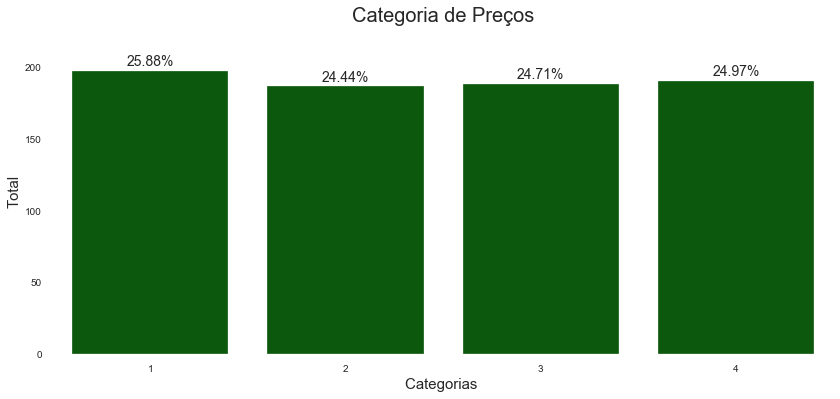

In [288]:
total = len(df[preços])
plt.figure(figsize=(14,6))

g = sns.countplot(x='Preços_Cat', color='darkgreen',
                  data=df[preços])
g.set_title("Categoria de Preços", fontsize=20)
g.set_xlabel("Categorias ", fontsize=15)
g.set_ylabel("Total", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

plt.show()

Como é de se esperar, os outliers existentes são superiores, i.e. Vinhos raros e/ou altamente premiados.

In [104]:
profile = pp.ProfileReport(df[NUM])

## Pontuação

Os vinhos no geral são bem pontuados:
 * Média: 3.88
 * Mediana: 4.0

Adaptado de https://www.kaggle.com/kabure/wine-review-s-eda-recommend-systems

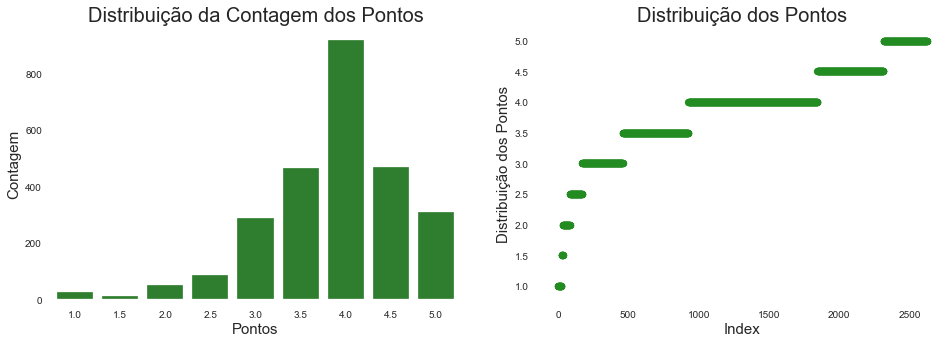

In [86]:
# define the size of figures that I will build
plt.figure(figsize=(16,5))

plt.subplot(1,2,1) # this will create a grid of 1 row and 2 columns; this is the first graphic
g = sns.countplot(x='Pontuação', data=df, color='forestgreen') # seting the seaborn countplot to known the points distribuition
g.set_title("Distribuição da Contagem dos Pontos", fontsize=20) # seting title and size of font
g.set_xlabel("Pontos", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Contagem", fontsize=15) # seting ylabel and size of font

plt.subplot(1,2,2)  # this will set the second graphic of our grid
plt.scatter(range(df.shape[0]), np.sort(df.Pontuação.values), color='forestgreen') # creating a cumulative distribution
plt.xlabel('Index', fontsize=15)  # seting xlabel and size of font
plt.ylabel('Distribuição dos Pontos', fontsize=15)  # seting ylabel and size of font
plt.title("Distribuição dos Pontos", fontsize=20) # seting title and size of font

plt.show() #rendering the graphs

A mediana é próxima da média e portanto a distribuição se aproxima a uma distribuição normal em torno de 4 pontos. Poucos vinhos possuem pontuação menor que 3.

No entanto há algumas ressalvas a serem consideradas como o número de diferentes avaliações para o mesmo vinho, i.e. a interpretação da pontuação deve ser considerada pelo número de avaliações recebidas. Em outras palavras, a confiabilidade na pontuação é diretamente proporcional à contagem de avaliações distintas. Um vinho com 5 pontos e somente uma avaliação não possui o mesmo peso que um vinho com 4.5 porém com 100 avaliações. A confiabilidade do 2º caso é muito maior.

Vamos analisar a contagem de avaliações a seguir

## # de Avaliações
O Número de Avaliações por vinho é altamente "skewed". Somente cerca de 1/3 dos vinhos somente foram avaliados e mesmo dentre esses o número de avaliações é muito baixo. Existem poucos vinhos extremamente populares com um grande número de avaliações.
* Média: 16.5
* Mediana: 6
* IQR: 16
* Máximo

In [177]:
pd.qcut(df[df.Avaliações.notna()].Avaliações.values, 5) # , labels=['muito_baixo', 'baixo', 'médio', 'bom', 'alto'], retbins=True)

[(22.0, 1014.0], (22.0, 1014.0], (4.0, 10.0], (0.999, 2.0], (10.0, 22.0], ..., (22.0, 1014.0], (4.0, 10.0], (10.0, 22.0], (22.0, 1014.0], (10.0, 22.0]]
Length: 2631
Categories (5, interval[float64]): [(0.999, 2.0] < (2.0, 4.0] < (4.0, 10.0] < (10.0, 22.0] < (22.0, 1014.0]]

In [150]:
df[df.Avaliações.notna()].shape

(2631, 23)

In [181]:
def cat_points(points):
    if points <= 2:
        return 1
    elif 2 < points <= 4:
        return 2
    elif 4 < points <= 10:
        return 3
    elif 10 < points <= 22:
        return 4
    else:
        return 5    

In [182]:
df['Pontuação_Cat'] = df.Avaliações.apply(cat_points)

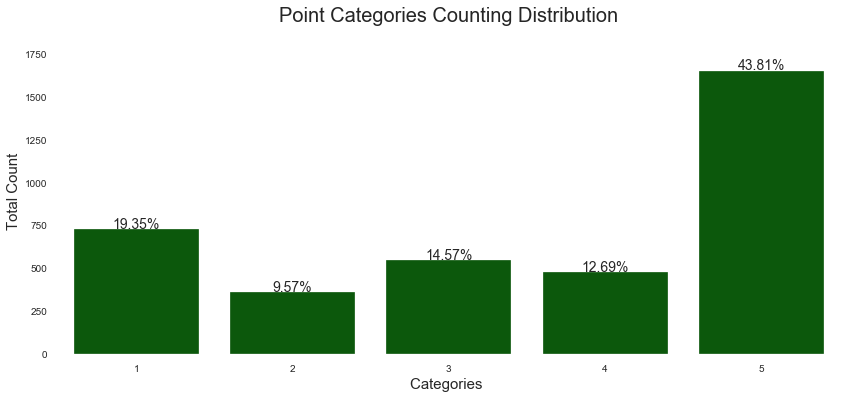

In [183]:
total = len(df)
plt.figure(figsize=(14,6))

g = sns.countplot(x='Pontuação_Cat', color='darkgreen',
                  data=df)
g.set_title("Categoria da Pontuação Ponderada pelo número de Avaliações", fontsize=20)
g.set_xlabel("Categories ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

plt.show()

In [209]:
guarda = df.Potencial_Guarda.notna()
pd.qcut(df[guarda].Potencial_Guarda, 3)

0       (0.999, 4.0]
1       (0.999, 4.0]
2        (6.0, 50.0]
3        (6.0, 50.0]
4       (0.999, 4.0]
            ...     
3777      (4.0, 6.0]
3778    (0.999, 4.0]
3779    (0.999, 4.0]
3780    (0.999, 4.0]
3781      (4.0, 6.0]
Name: Potencial_Guarda, Length: 3729, dtype: category
Categories (3, interval[float64]): [(0.999, 4.0] < (4.0, 6.0] < (6.0, 50.0]]

In [217]:
def estoque_cat(points):
    if points < 5:
        return 1
    elif 5 <= points <= 10:
        return 2
    else:
        return 3    

In [218]:
df['Estoque_Cat'] = df.Potencial_Guarda.apply(estoque_cat)

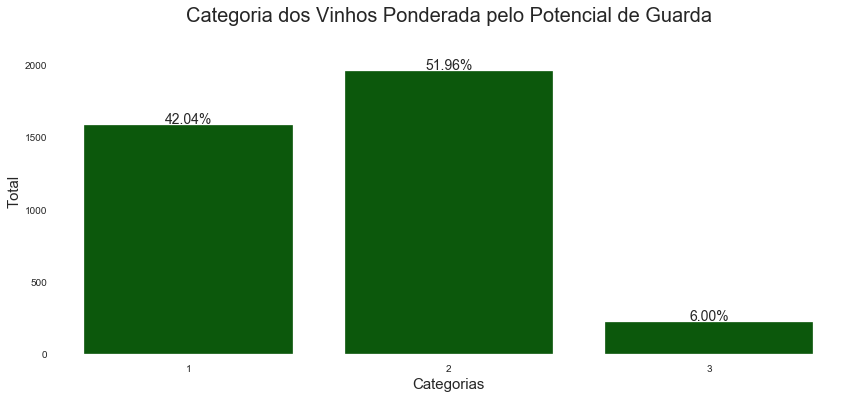

In [221]:
total = len(df)
plt.figure(figsize=(14,6))

g = sns.countplot(x='Estoque_Cat', color='darkgreen',
                  data=df)
g.set_title("Categoria dos Vinhos Ponderada pelo Potencial de Guarda", fontsize=20)
g.set_xlabel("Categorias", fontsize=15)
g.set_ylabel("Total", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

plt.show()

Vinhos 

In [223]:
df[df.Pontuação_Cat == 5 & df.Preço_Normal.isna()].shape

(611, 26)